<a href="https://colab.research.google.com/github/yeesem/Machine-Learning/blob/main/HVC_DTS_(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. ML Method to use**<br>
  - Polynomial Regression<br>

**2. Features of interest**<br>
   - Electrical voltage, Electrical Current, Site<br>

**3. MSE : 26.68, MAE: 4.26 with degree of 2**



In [3]:
import pandas as pd
import numpy as np
import zipfile

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!unzip '/content/drive/MyDrive/Test 2/hvc_dts.csv.gzip'

Archive:  /content/drive/MyDrive/Test 2/hvc_dts.csv.gzip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/drive/MyDrive/Test 2/hvc_dts.csv.gzip or
        /content/drive/MyDrive/Test 2/hvc_dts.csv.gzip.zip, and cannot find /content/drive/MyDrive/Test 2/hvc_dts.csv.gzip.ZIP, period.


In [6]:
# Read the CSV file into a pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/Test 2/hvc_dts.csv.gzip')

In [7]:
data.head()

,Site,Segment,Timestamp,Location,ElectricalCurrent,ElectricalVoltage,Temperature,Performance
0,Oceania,foo-ba,2018-04-19 16:12:23,31.42,4817.024581,5.721969e+05,92.584483,UNDERPERFORMING
1,Oceania,foo-ba,2018-04-19 16:12:23,1665.05,2592.415864,1.063212e+06,78.983756,UNDERPERFORMING
2,Oceania,foo-ba,2018-04-19 16:12:23,3298.67,1051.501885,2.621285e+06,69.346272,NaN
3,Oceania,foo-ba,2018-04-19 16:12:23,4932.30,194.263779,1.418837e+07,70.354899,UNDERPERFORMING
4,Oceania,foo-ba,2018-04-19 16:12:23,6565.93,20.713071,1.330699e+08,63.940873,UNDERPERFORMING


In [8]:
data.columns

Index(['Site', 'Segment', 'Timestamp', 'Location', 'ElectricalCurrent',
       'ElectricalVoltage', 'Temperature', 'Performance'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10306376 entries, 0 to 10306375
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Site               object 
 1   Segment            object 
 2   Timestamp          object 
 3   Location           float64
 4   ElectricalCurrent  float64
 5   ElectricalVoltage  float64
 6   Temperature        float64
 7   Performance        object 
dtypes: float64(4), object(4)
memory usage: 629.1+ MB


In [10]:
for col in data.columns:
  print(col)
  total_data = len(data[col])
  total_null_data = sum(data[col].isnull())
  print("Total number of cols : ",total_data)
  print("Number of null value : ",total_null_data)
  print("Percentage of null value : ",round(total_null_data/total_data*100,3),'%')
  print()
  print(data[col].value_counts())
  print()
  print('----------------------------------------------------')

Site
Total number of cols :  10306376
Number of null value :  1093720
Percentage of null value :  10.612 %

Site
Oceania    4606973
Slump      4038315
Gale        567368
Name: count, dtype: int64

----------------------------------------------------
Segment
Total number of cols :  10306376
Number of null value :  1093720
Percentage of null value :  10.612 %

Segment
qu-x               1388431
xyzzy-plugh        1156859
foo-ba             1009768
corge-garply        946380
thud-xyzzy          736183
r-qu                631105
qu-ux               567945
foobar-corge        525845
ba-r                504884
fred-waldo          504786
z-qu                315525
hogera-hogehoge     231048
hoge-fuga           210200
ba-z                189315
thud-fred           168262
fuga-piyo           126120
Name: count, dtype: int64

----------------------------------------------------
Timestamp
Total number of cols :  10306376
Number of null value :  0
Percentage of null value :  0.0 %

Timestamp
2023-

In [11]:
df = data.copy()

col_to_drop = ['Location','Timestamp']
df.drop(col_to_drop,inplace = True,axis = 1)

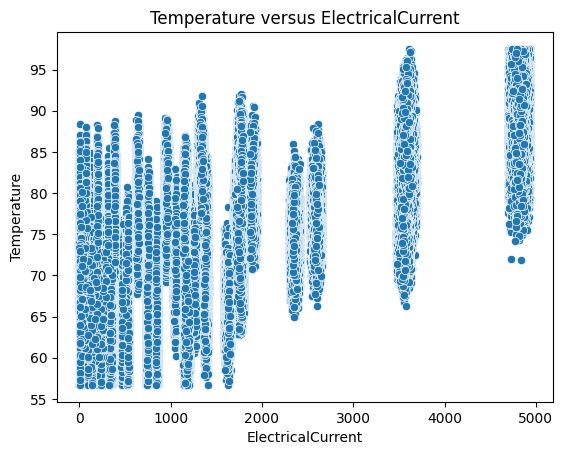

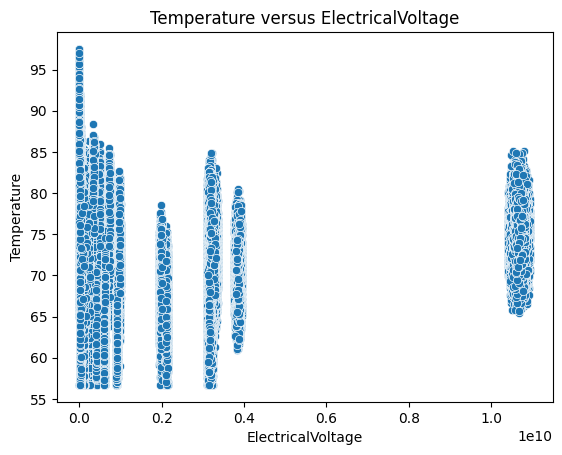

In [12]:
cols = ['ElectricalCurrent','ElectricalVoltage']

for col in cols:
    sns.scatterplot(x=col, y='Temperature', data=data)
    plt.title(f'Temperature versus {col}')
    plt.xlabel(col)
    plt.ylabel('Temperature')
    plt.show()

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = df[cols]
y = df['Temperature']

X_normalized = scaler.fit_transform(X)

test_size = 0.3

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state = 42)

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Define the degree of the polynomial
degree = [2,3,4,5,6,7]

for d in degree:
    print("Degree : ",d)
    # Transform the features into polynomial features
    poly_features = PolynomialFeatures(degree=d)
    X_poly = poly_features.fit_transform(X_train)

    # Initialize and fit the polynomial regression model
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly, y_train)

    # Make predictions
    y_pred = poly_reg.predict(X_poly)

    # Assuming y_true contains the true target values and y_pred contains the predicted values
    mse = mean_squared_error(y_train, y_pred)
    mae = mean_absolute_error(y_train,y_pred)

    print('Training MSE and MAE : ')
    print("MSE : ",mse)
    print("MAE : ",mae)

    print()

    X_poly = poly_features.fit_transform(X_test)

    y_pred = poly_reg.predict(X_poly)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    y_pred = poly_reg.predict(X_poly)
    print("Testing MSE and MAE : ")
    print('MSE : ',mse)
    print('MAE : ',mae)

    print()
    print("-------------------------------------------")

Degree :  2
Training MSE and MAE : 
MSE :  26.676669001637233
MAE :  4.263869123426556

Testing MSE and MAE : 
MSE :  26.626968574925268
MAE :  4.258731924325624

-------------------------------------------
Degree :  3
Training MSE and MAE : 
MSE :  40.929998203469545
MAE :  5.085325373395161

Testing MSE and MAE : 
MSE :  40.928683429976644
MAE :  5.083669991631536

-------------------------------------------
Degree :  4
Training MSE and MAE : 
MSE :  41.06288018551418
MAE :  5.074214977287712

Testing MSE and MAE : 
MSE :  41.06013714140725
MAE :  5.072063276818223

-------------------------------------------
Degree :  5
Training MSE and MAE : 
MSE :  41.17645763920841
MAE :  5.076289865971719

Testing MSE and MAE : 
MSE :  41.17263193902915
MAE :  5.074123611073222

-------------------------------------------
Degree :  6
Training MSE and MAE : 
MSE :  41.19126070251011
MAE :  5.074751759705573

Testing MSE and MAE : 
MSE :  41.18741873966543
MAE :  5.072624707438339

---------------

In [26]:
df.dropna(subset = ['Site'],inplace = True)

In [23]:
def convert_one_hot_to_numerical(col):
  if col == False:
    return 0
  else:
    return 1

In [27]:
one_hot_perform = pd.get_dummies(df['Site']).astype(int)
one_hot_perform

,Gale,Oceania,Slump
0,0,1,0
1,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0
...,...,...,...
10306371,0,0,1
10306372,0,0,1
10306373,0,0,1
10306374,0,0,1


In [28]:
# Concatenate the one-hot encoded DataFrame with the original DataFrame
df_encoded = pd.concat([df, one_hot_perform], axis=1)

cols = cols + ['Gale','Oceania','Slump']

print(cols)

['ElectricalCurrent', 'ElectricalVoltage', 'Gale', 'Oceania', 'Slump']


In [29]:
def train_model(cols):
    scaler = MinMaxScaler()

    X = df_encoded[cols]
    y = df_encoded['Temperature']

    X_normalized = scaler.fit_transform(X)

    test_size = 0.3

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state = 42)

    # Define the degree of the polynomial
    degree = [2,3,4,5]

    for d in degree:
        print("Degree : ",d)
        # Transform the features into polynomial features
        poly_features = PolynomialFeatures(degree=d)
        X_poly = poly_features.fit_transform(X_train)

        # Initialize and fit the polynomial regression model
        poly_reg = LinearRegression()
        poly_reg.fit(X_poly, y_train)

        # Make predictions
        y_pred = poly_reg.predict(X_poly)

        # Assuming y_true contains the true target values and y_pred contains the predicted values
        mse = mean_squared_error(y_train, y_pred)
        mae = mean_absolute_error(y_train,y_pred)

        print('Training MSE and MAE : ')
        print("MSE : ",mse)
        print("MAE : ",mae)

        print()

        X_poly = poly_features.fit_transform(X_test)

        y_pred = poly_reg.predict(X_poly)

        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test,y_pred)
        y_pred = poly_reg.predict(X_poly)
        print("Testing MSE and MAE : ")
        print('MSE : ',mse)
        print('MAE : ',mae)

        print()
        print("-------------------------------------------")

In [ ]:
train_model(cols)

Degree :  2
Training MSE and MAE : 
MSE :  27.58184985943025
MAE :  4.366422882580053

Testing MSE and MAE : 
MSE :  27.57278614911033
MAE :  4.365887701345209

-------------------------------------------
Degree :  3
